<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Numpy - 고성능 과학 계산과 다차원 배열을 위한 패키지
- pandas - 파이썬 데이터 분석을 위한 전문 패키지
- matplotlib - 파이썬 데이터 시각화 기본 패키지
- ScyPy - NumPy 를 기반으로 수학과 과학 계산, 미적분, 확률 선형대수 , 최적화등 알고리즘 구현 패키지
- scikit-lean - 머신러닝패키지




In [1]:
import numpy as np

# 샘플 데이터
x = [0, 3, 5, 7, 10]

# 표준 편차
s = np.std(x)
print(f"표준편차 : {s}")
# 평균
m = np.mean(x)
print(f"평균 : {m}")
# 7이라는 데이터의 z 점수(=표준점수)
z = (7 - m) / s
print(z)

표준편차 : 3.40587727318528
평균 : 5.0
0.5872202195147035


In [3]:
# scipy 이용한 각각의 데이터의 표준점수 ( = z 점수) 구하기
from scipy import stats
stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [4]:
# 누적 분포
# 평균(가운데 위치)까지의 분포의 합
stats.norm.cdf(0)

np.float64(0.5)

In [5]:
# 평균에서 표준 편차 만큼 (-1 ~ 1) 누적분포 구하기 - 68% 확률로 데이터가 존재한다.
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

np.float64(0.6826894921370859)

In [6]:
# 평균에서 표준 편차 만큼 (-2 ~ 2) 누적분포 구하기 - 95% 확률로 데이터가 존재한다.
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

np.float64(0.9544997361036416)

In [8]:
stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)

np.float64(0.950004209703559)

In [7]:
stats.norm.ppf(0.9)

np.float64(1.2815515655446004)

In [42]:
# 필요한 데이터 준비 - 다운로드
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 109MB/s]


'ns_book7.csv'

In [51]:
import pandas as pd

# low_memory=False 설정에 따라 데이터가 달라 질 수 있다.
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


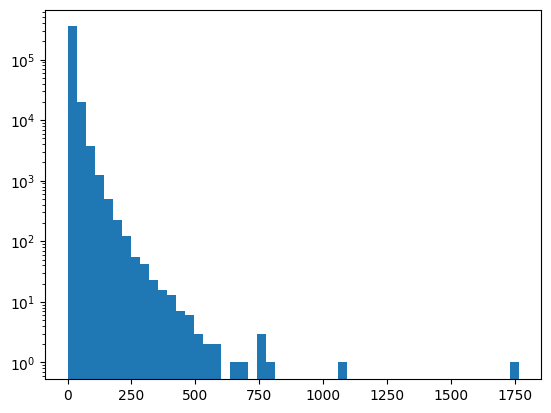

In [12]:
import matplotlib.pyplot as plt

# hist() 그래프의 타입 히스토리그램
plt.hist(ns_book7['대출건수'], bins=50)
# 로그처리 : 작 -> 크게, 큰 -> 작게 (작은 데이터가 잘 보이게)
plt.yscale('log')
plt.show()

In [13]:
# 샘플링하기 (= 표본 만들기)
np.random.seed(42)
sample_means = []
# 1000 번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
  # 대출건수의 대해서 30개를 랜던하게 선택하고 평균을 낸다.
  m = ns_book7['대출건수'].sample(30).mean()
  sample_means.append(m)

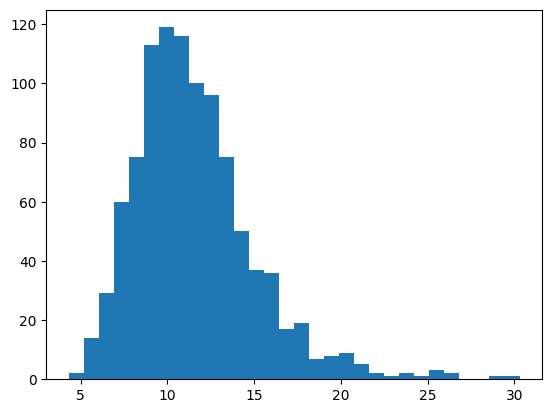

In [14]:
# 거의 정규분포 그래프가 된다.
plt.hist(sample_means, bins=30)
plt.show()

In [15]:
# 모집단의 평균과 표본(30개)의 평균을 비교해보자.
# 표본의 평균
np.mean(sample_means)

np.float64(11.539900000000001)

In [16]:
ns_book7['대출건수'].mean()

np.float64(11.593438968070707)

In [17]:
# 샘플링하기 (= 표본 만들기) - 개수 줄이기
np.random.seed(42)
sample_means = []
# 1000 번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
  # 대출건수의 대해서 20개를 랜던하게 선택하고 평균을 낸다.
  m = ns_book7['대출건수'].sample(20).mean()
  sample_means.append(m)
np.mean(sample_means)

np.float64(11.39945)

In [18]:
# 샘플링하기 (= 표본 만들기) - 개수 늘리기
np.random.seed(42)
sample_means = []
# 1000 번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
  # 대출건수의 대해서 40개를 랜던하게 선택하고 평균을 낸다.
  m = ns_book7['대출건수'].sample(40).mean()
  sample_means.append(m)
np.mean(sample_means)

np.float64(11.5613)

In [19]:
np.std(sample_means)

np.float64(3.0355987564235165)

In [20]:
np.std(ns_book7['대출건수']) / np.sqrt(40)

np.float64(3.048338251813498)

In [52]:
# 주제 분류 번호 00로 시작하고 도서명에 파이썬이 포함되어 있는 인덱스 구하기
python_books_index= ns_book7["주제분류번호"].str.startswith("00") & \
    ns_book7["도서명"].str.contains("파이썬")
# data frame 만들기
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [29]:
len(ns_book7)

376770

In [53]:
len(python_books)

251

In [54]:
python_mean = np.mean(python_books["대출건수"])
python_mean

np.float64(14.749003984063744)

In [55]:
python_std = np.std(python_books["대출건수"])
python_se = python_std / np.sqrt(len(python_books))
python_se

np.float64(0.8041612072427442)

In [35]:
# 95% 범위
# 5%를 반으로 나눈다. 2.5 - 2.5 ~ 97.5 => 97.5 - 2.5 -> 95
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [36]:
stats.norm.ppf(0.975)

np.float64(1.959963984540054)

In [56]:
print(python_mean - 1.96 * python_se, python_mean +1.96 * python_se)

13.172848017867965 16.325159950259522


In [57]:
# 주제 분류 번호 00로 시작하고 도서명에 C++이 포함되어 있는 인덱스 구하기
cplus_books_index= ns_book7["주제분류번호"].str.startswith("00") & \
    ns_book7["도서명"].str.contains("C++", regex=False)
# data frame 만들기
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [58]:
len(cplus_books)

89

In [59]:
# 평균
cplus_mean = np.mean(cplus_books["대출건수"])
cplus_mean

np.float64(11.595505617977528)

In [60]:
cplus_se = np.std(cplus_books["대출건수"]) / np.sqrt(len(cplus_books))
cplus_se

np.float64(0.9748405650607012)

In [61]:
(python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)

np.float64(2.4954081951407074)

In [62]:
stats.norm.cdf(2.50)

np.float64(0.9937903346742238)